In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
import pandas as pd
import xarray as xr

import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')


import ml_estimation as ml
import model1_plots as mp
import Utilities as util

array(['cloud', 'clear sky', nan], dtype=object)

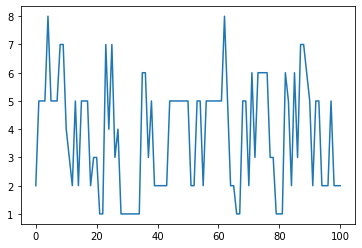

In [104]:
plt.plot(df.loc[:100,'ISCCP'])
df.cloud.unique()

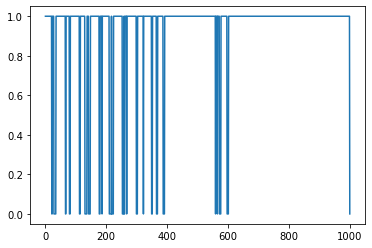

In [105]:
util.ISCCP_classes
plt.plot(df.cloud == 'cloud')

decreased sample size
converged =  True


14.970000001877745

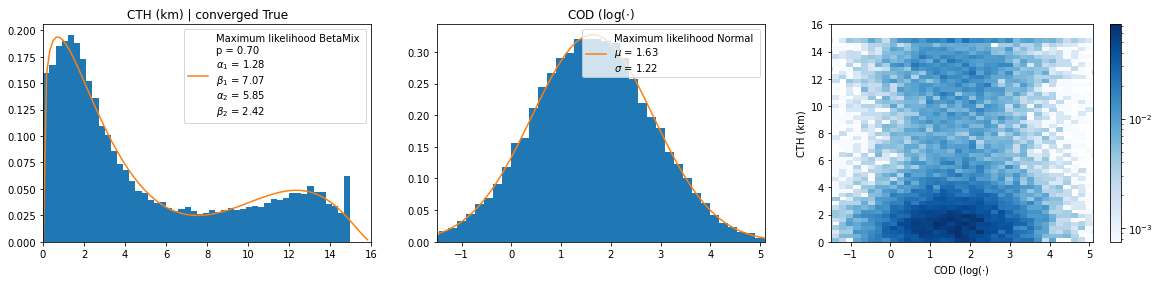

In [4]:
n = 100000
df = pd.read_csv(f'../data/simulation/model1/sim_n={n}.csv')
df_cc = df.dropna()
mp.plot_distribution_next_cloud(df_cc, ML = True, mixture = True, density = True)
df.h_t.min()

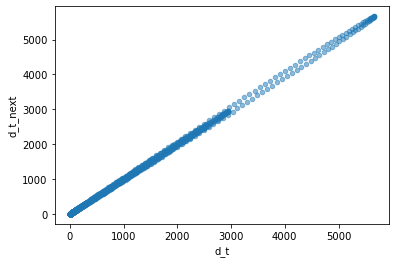

In [3]:
df_cc.plot.scatter('d_t', 'd_t_next', alpha = .5)

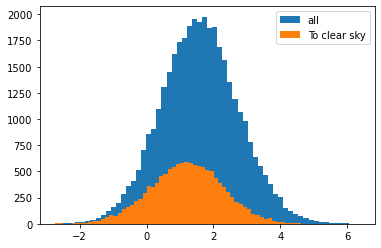

In [28]:
plt.hist(df.loc[:,'d_t'], bins = 60, label = 'all')
plt.hist(df.loc[df.cloud_next == 'clear sky'].d_t, bins = 60, label = 'To clear sky')
plt.legend()


In [29]:
pd.crosstab(df.cloud, df.cloud_next, rownames=['from'], colnames=[ 'to'], margins = True, normalize = 'index')

to,clear sky,cloud
from,,
clear sky,0.798796,0.201204
cloud,0.341835,0.658165
All,0.629476,0.370524


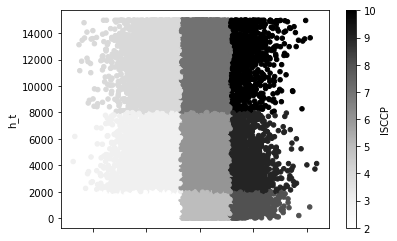

In [34]:
df.plot.scatter('d_t', 'h_t', c = 'ISCCP')

to,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
from,,,,,,,,,,
1.0,0.798796,0.036968,0.039415,0.006434,0.049439,0.049137,0.009103,0.004814,0.005243,0.000651
2.0,0.451096,0.273693,0.056661,0.035413,0.133895,0.026476,0.015346,0.005565,0.001349,0.000506
3.0,0.450127,0.052152,0.225148,0.082869,0.025823,0.121013,0.036118,0.001519,0.003544,0.001688
4.0,0.461458,0.006657,0.067624,0.313245,0.002803,0.026279,0.120182,0.000000,0.001051,0.000701
5.0,0.293296,0.183528,0.037619,0.009136,0.326750,0.067849,0.012764,0.055085,0.011958,0.002015
6.0,0.292482,0.026777,0.144954,0.035530,0.050721,0.304454,0.078656,0.006050,0.048275,0.012101
7.0,0.296101,0.000790,0.028714,0.128030,0.000790,0.074289,0.395943,0.000000,0.012908,0.062434
8.0,0.131059,0.062837,0.011670,0.000000,0.442549,0.070018,0.002693,0.236086,0.042190,0.000898
9.0,0.124539,0.002948,0.036846,0.008106,0.039794,0.349300,0.061164,0.036109,0.289609,0.051584


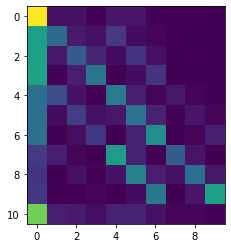

In [81]:
T_total = pd.crosstab(df.ISCCP, df.ISCCP_next, rownames=['from'], colnames=[ 'to'], normalize = 'index', margins = True)
T = T_total.iloc[:-1]
plt.imshow(T_total)
T.columns, T.index = T.columns.astype(int), T.index.astype(int)
T_total


In [77]:
util.ISCCP_classes

T.rename(columns = util.ISCCP_classes, index = util.ISCCP_classes)
imshow(T)

to,clear sky,cumulus,altocumulus,cirrus,stratocumulus,altostratus,cirrostratus,stratus,nimbostratus,deep convection
from,,,,,,,,,,
clear sky,0.798796,0.036968,0.039415,0.006434,0.049439,0.049137,0.009103,0.004814,0.005243,0.000651
cumulus,0.451096,0.273693,0.056661,0.035413,0.133895,0.026476,0.015346,0.005565,0.001349,0.000506
altocumulus,0.450127,0.052152,0.225148,0.082869,0.025823,0.121013,0.036118,0.001519,0.003544,0.001688
cirrus,0.461458,0.006657,0.067624,0.313245,0.002803,0.026279,0.120182,0.000000,0.001051,0.000701
stratocumulus,0.293296,0.183528,0.037619,0.009136,0.326750,0.067849,0.012764,0.055085,0.011958,0.002015
altostratus,0.292482,0.026777,0.144954,0.035530,0.050721,0.304454,0.078656,0.006050,0.048275,0.012101
cirrostratus,0.296101,0.000790,0.028714,0.128030,0.000790,0.074289,0.395943,0.000000,0.012908,0.062434
stratus,0.131059,0.062837,0.011670,0.000000,0.442549,0.070018,0.002693,0.236086,0.042190,0.000898
nimbostratus,0.124539,0.002948,0.036846,0.008106,0.039794,0.349300,0.061164,0.036109,0.289609,0.051584


In [9]:
T_total = pd.crosstab(df.cloud, df.cloud_next, rownames=['from'], colnames=[ 'to'], normalize = 'index', margins = True)
# T = T_total.iloc[:-1]
# plt.imshow(T_total)
# T.columns, T.index = T.columns.astype(int), T.index.astype(int)
T_total


to,clear sky,cloud
from,,
clear sky,0.798796,0.201204
cloud,0.341835,0.658165
All,0.629476,0.370524
